# **Exploratory Data Analysis of UPI App Reviews**

UPI (Unified Payments Interface) has revolutionized digital payments in India. In this analysis, we will explore customer reviews of the top 3 UPI apps - [GPay](https://play.google.com/store/apps/details?id=com.google.android.apps.nbu.paisa.user&hl=en&gl=US), [Paytm](https://play.google.com/store/apps/details?id=net.one97.paytm&hl=en&gl=US) and [PhonePe](https://play.google.com/store/apps/details?id=com.phonepe.app&hl=en&gl=US) on the Google Play Store to uncover insights.

#### Notebooks(used to scrape data and copy of this analysis), csv files of dataset can be found of my [GitHub Repositories.](http://https://github.com/hridjain/googleplayupireviews)

![](https://cdn.iconscout.com/icon/free/png-256/free-upi-2085056-1747946.png)

In our study, we have performed EDA on the reviews of three popular UPI (Unified Payments Interface) apps in India - Google Pay, Paytm, and PhonePe. The dataset for this analysis is scraped from publicly available data on Google Play Store. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Initially, we will import libraries in new notebook and load the data using the pandas read_csv function. 
We can directly use data uploaded on Kaggle but I prefer using it from GitHub so code can be executed from anywhere.

In [2]:
google_data = pd.read_csv("https://github.com/hridjain/googleplayupireviews/raw/main/gpay_help.csv")
paytm_data = pd.read_csv("https://github.com/hridjain/googleplayupireviews/raw/main/paytm_help.csv")
phonepe_data = pd.read_csv("https://github.com/hridjain/googleplayupireviews/raw/main/phonepe_help.csv")

The data for each app is loaded into separate dataframes for individual analysis. The .head() function provides the first five records of each dataset, giving us an idea of the structure and features of the data.

In [3]:
google_data.head()

,reviewId,userName,Unnamed: 2,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,113fba88-7864-4c9f-8f08-b228217a2069,Shourya Tripathi,NaN,I have a couple of feedback for the product te...,4,17558,171.1.4 (arm64-v8a_release_flutter),2/17/2023 7:53,NaN,NaN,171.1.4 (arm64-v8a_release_flutter)
1,fab1f7f9-6691-46a7-bc22-8c0ef7baf413,SIMAN R,NaN,"After the last update, QR scanner no longer wo...",1,11020,176.1.2 (arm64-v8a_release_flutter),4/21/2023 9:20,"Regret the inconvenience, Siman. Our team is a...",4/21/2023 9:26,176.1.2 (arm64-v8a_release_flutter)
2,f42e2709-6957-4ee1-a011-6ee7e3c1f001,SUJIT BAGDI,NaN,T have been using this app for more than 3 yea...,2,10546,174.1.3 (arm64-v8a_release_flutter),4/1/2023 6:19,"Regret the inconvenience, Sujit. We suggest yo...",4/1/2023 6:37,174.1.3 (arm64-v8a_release_flutter)
3,56e48369-a70b-40a4-a5be-7ded7b60939c,Shubham Kulkarni,NaN,I have been using the application for a certai...,3,2754,170.1.5 (arm64-v8a_release_flutter),2/3/2023 11:01,"Regret the inconvenience, Shubham. We suggest ...",2/3/2023 11:11,170.1.5 (arm64-v8a_release_flutter)
4,e9279614-439c-4a1c-b978-f0e6924454bf,PARVEZ GUJJAR,NaN,"After the last update, QR scanner no longer wo...",3,27,183.1.1 (arm64-v8a_release_flutter),7/16/2023 6:14,"Regret the inconvenience, Parvez. Our team is ...",7/16/2023 6:24,183.1.1 (arm64-v8a_release_flutter)


In [4]:
paytm_data.head()

,reviewId,userName,Unnamed: 2,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,60df685b-c310-481a-b1a5-94cad1a3c335,Raj Nandha,NaN,Paytm's user interface (UI) is a disappointing...,1,1783,10.28.3,7/5/2023 6:15,Hi Raj! We’d like to take a closer look and he...,7/5/2023 6:23,10.28.3
1,f5edb45a-2dd8-4171-a106-656bc547fafa,Namrata M,NaN,I have been auto logged out from Paytm and I'm...,2,3209,9.13.7,6/25/2023 20:19,Please write to us at app.feedback@paytm.com. ...,6/21/2023 21:36,9.13.7
2,3fcb31f2-9c25-48cc-b7a4-d199778ba010,Moh'd Saif Ullah,NaN,Update: As requested contacted the developers ...,1,557,9.13.7,7/4/2023 3:49,Please write to us at app.feedback@paytm.com. ...,6/25/2023 18:47,9.13.7
3,419c9c09-09c1-468b-8fe5-162d6d06007c,John Vankal,NaN,"if you use a rooted phone, don't update it. (t...",3,390,10.28.3,6/28/2023 14:44,Please write to us at app.feedback@paytm.com. ...,1/21/2023 21:11,10.28.3
4,ce63efba-dd25-4c35-b610-60a85a79e3ca,Yogesh Hablani,NaN,When the app works property it's a good experi...,2,11,10.28.3,7/16/2023 5:38,NaN,NaN,10.28.3


In [5]:
phonepe_data.head()

,reviewId,userName,Unnamed: 2,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,297ae930-eccc-4db8-b0e7-0a9815a2d3e8,Lidhiya Joice,NaN,Using this app for a long time. The features g...,2,9471,23.05.13.0.4,6/5/2023 2:30,"Hello, Lidhiya. At PhonePe, transactions are i...",6/5/2023 3:04,23.05.13.0.4
1,63cf0ace-8b48-4e96-8ef9-ecc4f3a5d6dd,Sagar S,NaN,One of the best payment apps in India! The UI ...,4,22083,4.1.47,3/9/2023 20:53,"We are sorry to hear this, Sagar. Could you pl...",2/27/2023 7:03,4.1.47
2,94937a72-a557-4096-a0e1-dc46c32f903e,Sanjeev Jikamade,NaN,Annoying recharge popup which requires 2 taps ...,2,18190,4.1.46,3/1/2023 7:47,Hello Sanjeev! We understand your concern. You...,3/1/2023 7:56,4.1.46
3,dfaea4ab-b551-4e24-ba2f-c638097d1a60,Vaibhav Bhagat,NaN,I'm a visually impaired user who uses PhonePe ...,3,10016,4.1.46,2/16/2023 16:11,Thank you for reaching out to us with your val...,2/16/2023 16:50,4.1.46
4,8a63504e-55fc-44f5-84b7-614b0ac2cfb5,Maimona Begum,NaN,The UI is smooth and also works with weak data...,4,1762,4.1.46,2/25/2023 14:31,Hi. We’re sorry to know that your experience w...,2/25/2023 14:45,4.1.46


# **Feature Engineering**

In [6]:
google_data.dtypes

reviewId                 object
userName                 object
Unnamed: 2              float64
content                  object
score                     int64
thumbsUpCount             int64
reviewCreatedVersion     object
at                       object
replyContent             object
repliedAt                object
appVersion               object
dtype: object

The 'at' column in google_data is converted to datetime format. A new column 'date' is created by extracting the date from the 'at' column.

In [7]:
google_data['at'] = pd.to_datetime(google_data['at'])
google_data['date'] = google_data['at'].dt.date

The 'Unnamed: 2' column in dataset is dropped since it is not necessary for the analysis, such as at(after creating a date column in previous step) and repliedAt that signify the timestamp of the review and reply, respectively. Since reviewCreatedVersion and appVersion represent the same information, we also drop one of them.

In [8]:
google_data.drop('Unnamed: 2', axis = 'columns', inplace = True)
google_data.drop('at', axis = 'columns', inplace = True)
google_data.drop('repliedAt', axis = 'columns', inplace = True)
google_data.drop('reviewCreatedVersion', axis = 'columns', inplace = True)

The same operations are performed for the paytm_data and phonepe_data as well.

In [9]:
paytm_data['at'] = pd.to_datetime(paytm_data['at'])
paytm_data['date'] = paytm_data['at'].dt.date

In [10]:
paytm_data.drop('Unnamed: 2', axis = 'columns', inplace = True)
paytm_data.drop('at', axis = 'columns', inplace = True)
paytm_data.drop('repliedAt', axis = 'columns', inplace = True)
paytm_data.drop('reviewCreatedVersion', axis = 'columns', inplace = True)

In [11]:
phonepe_data['at'] = pd.to_datetime(phonepe_data['at'])
phonepe_data['date'] = phonepe_data['at'].dt.date
phonepe_data.drop('Unnamed: 2', axis = 'columns', inplace = True)
phonepe_data.drop('at', axis = 'columns', inplace = True)
phonepe_data.drop('repliedAt', axis = 'columns', inplace = True)
phonepe_data.drop('reviewCreatedVersion', axis = 'columns', inplace = True)

## **Handling Missing Values**

We first identify the presence of null values in our dataset using the .isnull().sum() function. This reveals that some features like replyContent and appVersion have null values.

In [12]:
google_data.isnull().sum()
paytm_data.isnull().sum()
phonepe_data.isnull().sum()

reviewId             0
userName             0
content              0
score                0
thumbsUpCount        0
replyContent     13355
appVersion        4179
date                 0
dtype: int64

The null values in replyContent indicate reviews that haven't received a reply from the app's team. The nulls in appVersion are missing data that we'll need to handl

To fill in the appVersion values, we will need to iterate through each row that has a null value for appVersion. For each of these rows, we will select the date associated with that row. Then, we will go through all the rows that have the same date and identify the version number that occurs most frequently. We will use this most frequent version number to replace the null value in the original row.

In [13]:
null_mask = google_data['appVersion'].isnull() #creates a boolean series with True at rows where 'appVersion' is null

for index,row in (google_data[null_mask].iterrows()):
  count = google_data[google_data['date']==row['date']]['appVersion'].value_counts()
  common = count.index[0]
  google_data.loc[index, 'appVersion'] = common

After this process, we check for null values again. The only null values left are in the replyContent column, representing reviews without a reply from the app's team.

In [14]:
google_data.isnull().sum()

reviewId             0
userName             0
content              0
score                0
thumbsUpCount        0
replyContent     16604
appVersion           0
date                 0
dtype: int64

The same operations are performed for the paytm_data and phonepe_data as well.

In [15]:
null_mask = paytm_data['appVersion'].isnull()

for index,row in (paytm_data[null_mask].iterrows()):
  count = paytm_data[paytm_data['date']==row['date']]['appVersion'].value_counts()
  common = count.index[0]
  paytm_data.loc[index, 'appVersion'] = common

In [16]:
null_mask = phonepe_data['appVersion'].isnull()

for index,row in (phonepe_data[null_mask].iterrows()):
  count = phonepe_data[phonepe_data['date']==row['date']]['appVersion'].value_counts()
  common = count.index[0]
  phonepe_data.loc[index, 'appVersion'] = common

## **Creating a table from Most Helpful Reviews for Word Analysis**

First, we will use .value_counts() to find frequency of reviews with a particular number of thumbsUpCount. We plot this on scatterplot using matplotlib

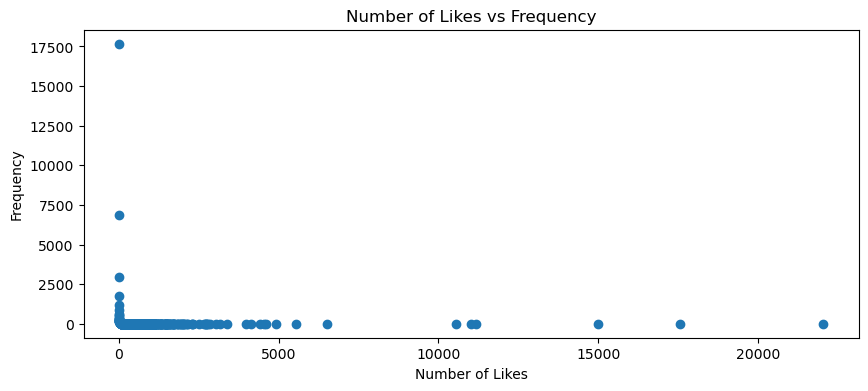

In [17]:
likes_count = google_data['thumbsUpCount'].value_counts().sort_index()
plt.figure(figsize=(10,4))

plt.title("Number of Likes vs Frequency")
plt.xlabel("Number of Likes")
plt.ylabel("Frequency")

plt.scatter(likes_count.index, likes_count.values)

Plot shows us about half data sits at 0 likes (about 17500 out of 40000). Lets zoom in by defining axes to separate outliers.

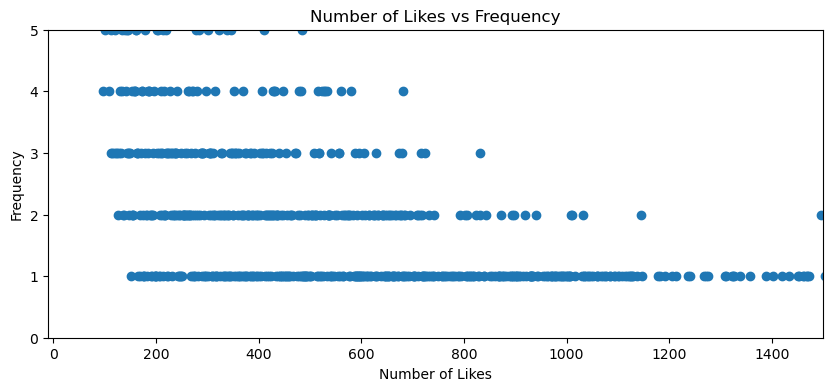

In [18]:
plt.figure(figsize=(10,4))
plt.xlim(-10,1500)
plt.ylim(0,5)
plt.title("Number of Likes vs Frequency")
plt.xlabel("Number of Likes")
plt.ylabel("Frequency")

plt.scatter(likes_count.index, likes_count.values)

We will create a separate table for reviews with a thumbs-up count **greater than 1100**. This will allow us to focus on the most highly rated reviews and potentially identify common themes or characteristics that contribute to their popularity. We will also delete these entries (outliers) from original dataframe.

In [19]:
google_mosthelpful = google_data[google_data['thumbsUpCount'] >= 1100]
google_data = google_data[google_data['thumbsUpCount'] < 1100]

The same operations are performed for the paytm_data and phonepe_data as well.

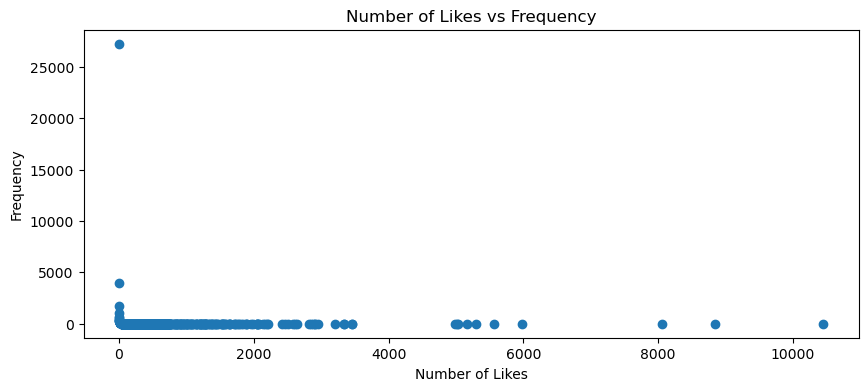

In [20]:
likes_count = paytm_data['thumbsUpCount'].value_counts().sort_index()
plt.figure(figsize=(10,4))

plt.title("Number of Likes vs Frequency")
plt.xlabel("Number of Likes")
plt.ylabel("Frequency")

plt.scatter(likes_count.index, likes_count.values)

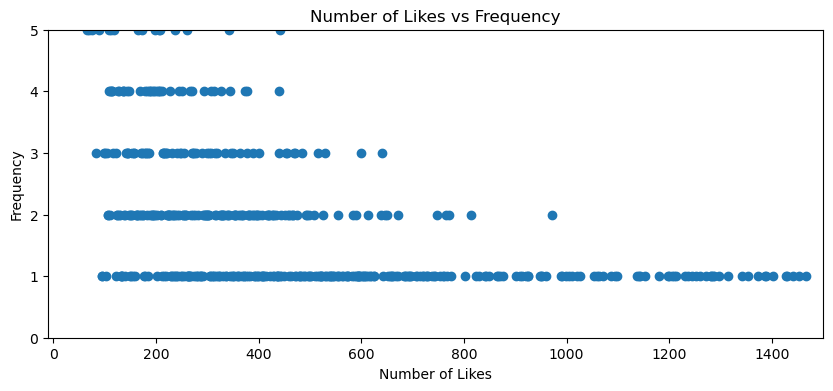

In [21]:
plt.figure(figsize=(10,4))
plt.xlim(-10,1500)
plt.ylim(0,5)
plt.title("Number of Likes vs Frequency")
plt.xlabel("Number of Likes")
plt.ylabel("Frequency")

plt.scatter(likes_count.index, likes_count.values)

We will create a separate table for reviews with a thumbs-up count **greater than 800**.

In [22]:
paytm_mosthelpful = paytm_data[paytm_data['thumbsUpCount'] >= 800]
paytm_data = paytm_data[paytm_data['thumbsUpCount'] < 800]

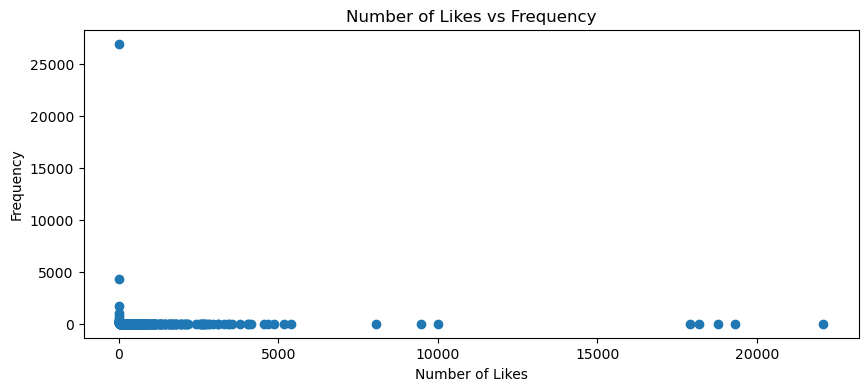

In [23]:
likes_count = phonepe_data['thumbsUpCount'].value_counts().sort_index()
plt.figure(figsize=(10,4))

plt.title("Number of Likes vs Frequency")
plt.xlabel("Number of Likes")
plt.ylabel("Frequency")

plt.scatter(likes_count.index, likes_count.values)

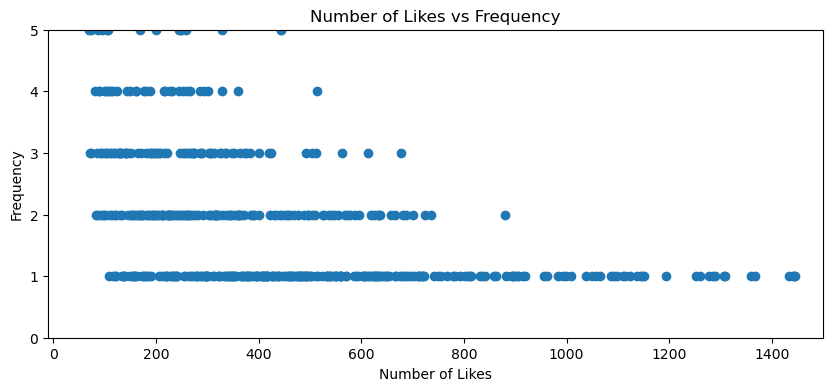

In [24]:
plt.figure(figsize=(10,4))
plt.xlim(-10,1500)
plt.ylim(0,5)
plt.title("Number of Likes vs Frequency")
plt.xlabel("Number of Likes")
plt.ylabel("Frequency")

plt.scatter(likes_count.index, likes_count.values)

We will create a separate table for reviews with a thumbs-up count **greater than 800**.

In [25]:
phonepe_mosthelpful = phonepe_data[phonepe_data['thumbsUpCount'] >= 800]
phonepe_data = phonepe_data[phonepe_data['thumbsUpCount'] < 800]

# EDA on Individual Company

### Most Positive Word and Negative Word in Helpful Reviews for GPay

In [26]:
from collections import Counter #to count the words
import re

The Counter module is imported for counting elements from a list. The RegEx module is used for regular expression operations like splitting strings by (space, dot, comma).

We will use list of stopwords(commonly used words in english) found on web and exclude them from our word analysis.

In [27]:
stopwords = ['i', 'me', 'even',"don't","it's",'','my', 'myself', 'we','app', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself','got','get', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now']

In [28]:
words = []
special_characters=['@','#','$','*','&',',','.','(',')','!']
google_mosthelpful5 = google_mosthelpful[(google_mosthelpful['score']==5) | (google_mosthelpful['score']==4)]
for review in google_mosthelpful5['content']:
    for word in re.split(r'[ .,]+', review):
        for i in special_characters:
          word=word.replace(i,"")
          if word.lower() not in stopwords:
            word = word.lower()
            words.append(word)

This block of code splits the content of each review into individual words, **removes special characters and stopwords**, and appends the processed(lower case) words to the words list only if **they are not in stopwords list** . Only reviews with a score of 4 or 5 are considered.

In [29]:
word_counts = Counter(words)
frequent_words = [word for word, count in word_counts.most_common()]
word_freq = [count for word, count in word_counts.most_common()]

First line creates a dictionary-like object which counts the frequency of each word in the words list.
Later two lines create lists of the most common words and their corresponding frequencies.

Following block of code creates a bar plot of the most common words and their frequencies. The x-axis represents the words, the y-axis represents the frequency of each word, and each bar in the plot represents a word.

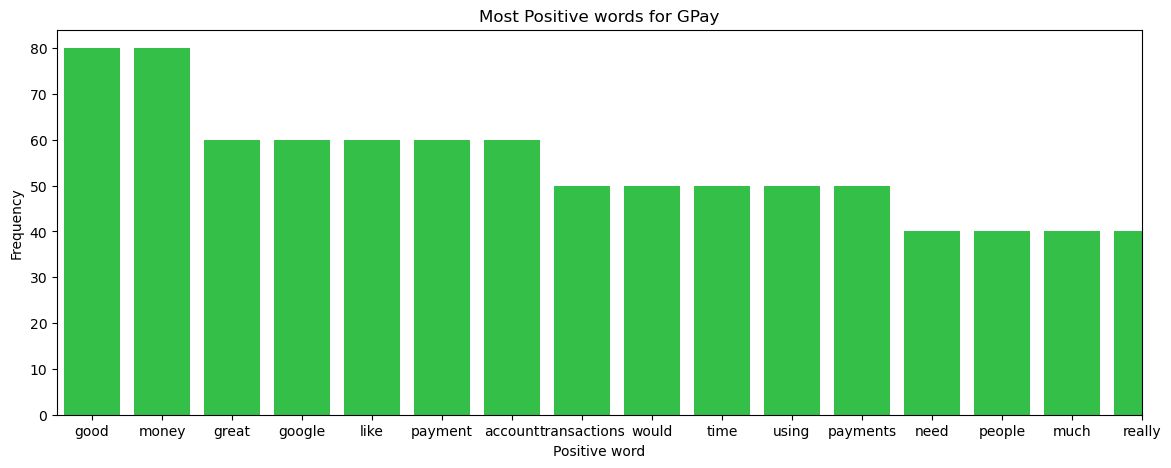

In [30]:
plt.figure(figsize=(14,5))
plt.bar(frequent_words,word_freq,color='#34BF49')
plt.title('Most Positive words for GPay')
plt.xlabel('Positive word')
plt.ylabel('Frequency')
plt.xlim(-0.5, 15)
plt.show()

A similar process is repeated for reviews with a score of 1 or 2 to get the most negative words.

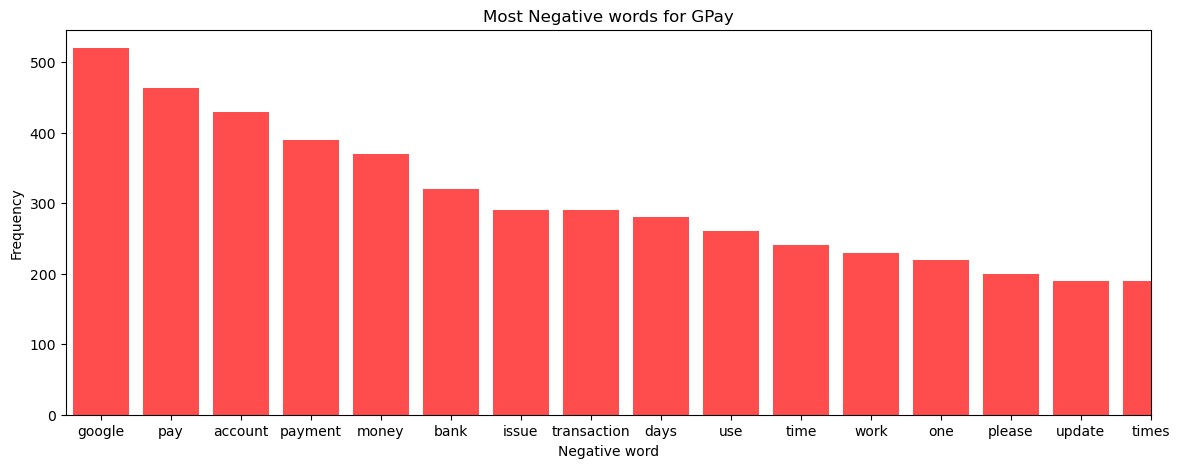

In [31]:
words = []
special_characters=['@','#','$','*','&',',','.','(',')','!']
google_mosthelpful1 = google_mosthelpful[(google_mosthelpful['score']==1) | (google_mosthelpful['score']==2)]
for review in google_mosthelpful1['content']:
    for word in re.split(r'[ .,]+', review):
        for i in special_characters:
          word=word.replace(i,"")
          if word.lower() not in stopwords:
            word = word.lower()
            words.append(word)

word_counts = Counter(words)
frequent_words = [word for word, count in word_counts.most_common()]
word_freq = [count for word, count in word_counts.most_common()]

plt.figure(figsize=(14,5))
plt.bar(frequent_words,word_freq,color='#FF4C4C')
plt.title('Most Negative words for GPay')
plt.xlabel('Negative word')
plt.ylabel('Frequency')
plt.xlim(-0.5, 15)
plt.show()

For Google Pay, the most common positive words are 'easy', 'good', 'great', and 'best', while negative words include 'issue', 'transaction', and 'problem'.

### Most Positive Word and Negative Word in Helpful Reviews for Paytm

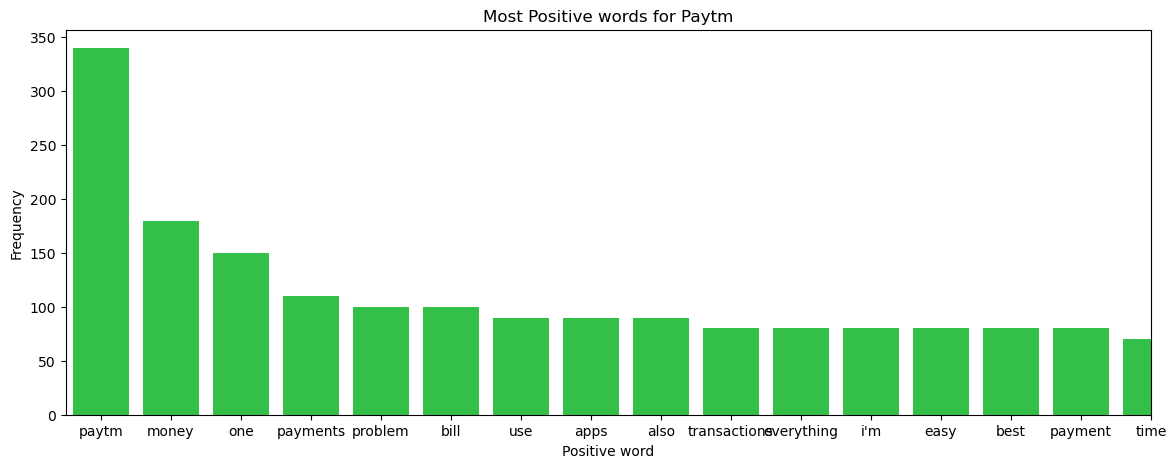

In [32]:
#for positive words
words = []
special_characters=['@','#','$','*','&',',','.','(',')','!']
paytm_mosthelpful5 = paytm_mosthelpful[(paytm_mosthelpful['score']==5)|(paytm_mosthelpful['score']==4)]
for review in paytm_mosthelpful5['content']:
    for word in re.split(r'[ .,]+', review):
        for i in special_characters:
          word=word.replace(i,"")
          if word.lower() not in stopwords:
            word = word.lower()
            words.append(word)
word_counts = Counter(words)
frequent_words = [word for word, count in word_counts.most_common()]
word_freq = [count for word, count in word_counts.most_common()]
plt.figure(figsize=(14,5))
plt.bar(frequent_words,word_freq,color='#34BF49')
plt.title('Most Positive words for Paytm')
plt.xlabel('Positive word')
plt.ylabel('Frequency')
plt.xlim(-0.5, 15)
plt.show()

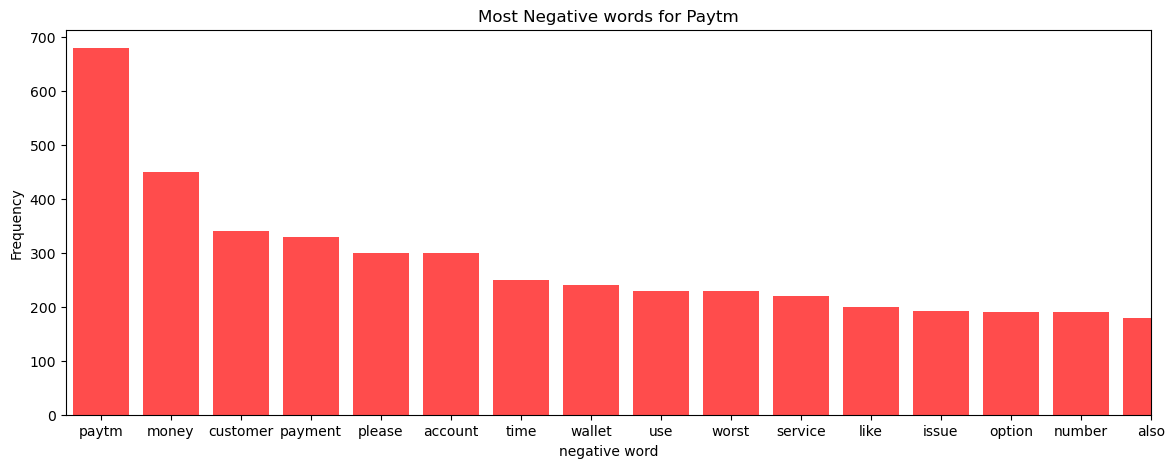

In [33]:
#for negative words
words = []
special_characters=['@','#','$','*','&',',','.','(',')','!']
paytm_mosthelpful1 = paytm_mosthelpful[(paytm_mosthelpful['score']==1)|(paytm_mosthelpful['score']==2)]
for review in paytm_mosthelpful1['content']:
    for word in re.split(r'[ .,]+', review):
        for i in special_characters:
          word=word.replace(i,"")
          if word.lower() not in stopwords:
            word = word.lower()
            words.append(word)
word_counts = Counter(words)
frequent_words = [word for word, count in word_counts.most_common()]
word_freq = [count for word, count in word_counts.most_common()]
plt.figure(figsize=(14,5))
plt.bar(frequent_words,word_freq,color='#FF4C4C')
plt.title('Most Negative words for Paytm')
plt.xlabel('negative word')
plt.ylabel('Frequency')
plt.xlim(-0.5, 15)
plt.show()

Negative Words for include 'customer' and 'service' indicating towards poor customer care.

### Most Positive Word and Negative Word in Helpful Reviews for PhonePe

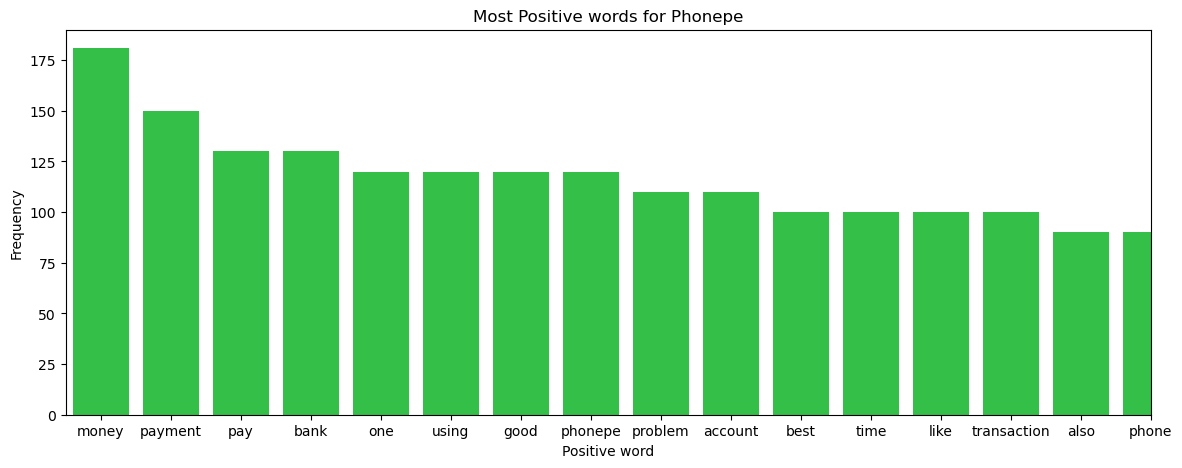

In [34]:
#for positive words
words = []
special_characters=['@','#','$','*','&',',','.','(',')','!']
phonepe_mosthelpful5 = phonepe_mosthelpful[(phonepe_mosthelpful['score']==5)|(phonepe_mosthelpful['score']==4)]
for review in phonepe_mosthelpful5['content']:
    for word in re.split(r'[ .,]+', review):
        for i in special_characters:
          word=word.replace(i,"")
          if word.lower() not in stopwords:
            word = word.lower()
            words.append(word)
word_counts = Counter(words)
frequent_words = [word for word, count in word_counts.most_common()]
word_freq = [count for word, count in word_counts.most_common()]
plt.figure(figsize=(14,5))
plt.bar(frequent_words,word_freq,color='#34BF49')
plt.title('Most Positive words for Phonepe')
plt.xlabel('Positive word')
plt.ylabel('Frequency')
plt.xlim(-0.5, 15)
plt.show()

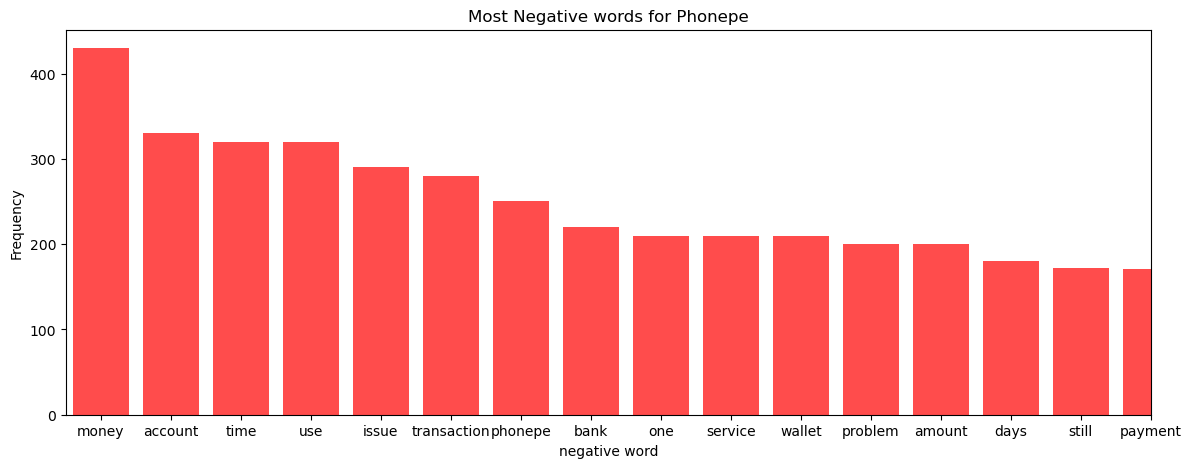

In [35]:
#for negative words
words = []
special_characters=['@','#','$','*','&',',','.','(',')','!']
phonepe_mosthelpful1 = phonepe_mosthelpful[(phonepe_mosthelpful['score']==1)|(phonepe_mosthelpful['score']==2)]
for review in phonepe_mosthelpful1['content']:
    for word in re.split(r'[ .,]+', review):
        for i in special_characters:
          word=word.replace(i,"")
          if word.lower() not in stopwords:
            word = word.lower()
            words.append(word)
word_counts = Counter(words)
frequent_words = [word for word, count in word_counts.most_common()]
word_freq = [count for word, count in word_counts.most_common()]
plt.figure(figsize=(14,5))
plt.bar(frequent_words,word_freq,color='#FF4C4C')
plt.title('Most Negative words for Phonepe')
plt.xlabel('negative word')
plt.ylabel('Frequency')
plt.xlim(-0.5, 15)
plt.show()

PhonePe reveals that words like 'best' and 'good' are common in positive reviews, while 'issue', 'transaction' frequently appear in negative reviews.

## Relationship Between Scores and Reply Given By Management

Next, we explore the relationship between scores and replies given by the app's management. We categorize each review as either having received a reply or not, then plot the count of each category against the score.

In [36]:
google_data["replyContent"] = google_data["replyContent"].fillna("No_reply")
paytm_data["replyContent"] = paytm_data["replyContent"].fillna("No_reply")
phonepe_data["replyContent"] = phonepe_data["replyContent"].fillna("No_reply")

The 'replyContent' column is filled with "No_reply" where there are null values.


A new column 'reply_given' is created that indicates whether a reply was given or not.

A count plot is then created to visualize the relationship between scores and whether a reply was given by the management. 

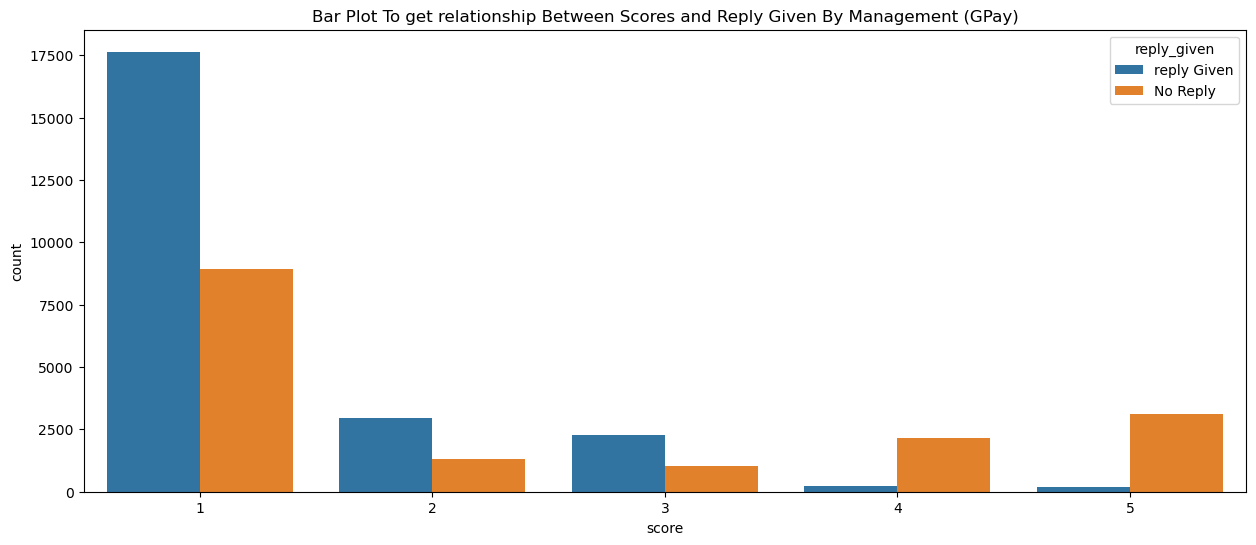

In [37]:
google_data["reply_given"] = google_data["replyContent"].apply(lambda x: "reply Given" if x != 'No_reply' else "No Reply")
plt.figure(figsize=(15,6))
sns.countplot(x="score", hue="reply_given", data=google_data,hue_order = ['reply Given','No Reply'])
plt.title('Bar Plot To get relationship Between Scores and Reply Given By Management (GPay)')
plt.show()

This process is repeated for each company's data.

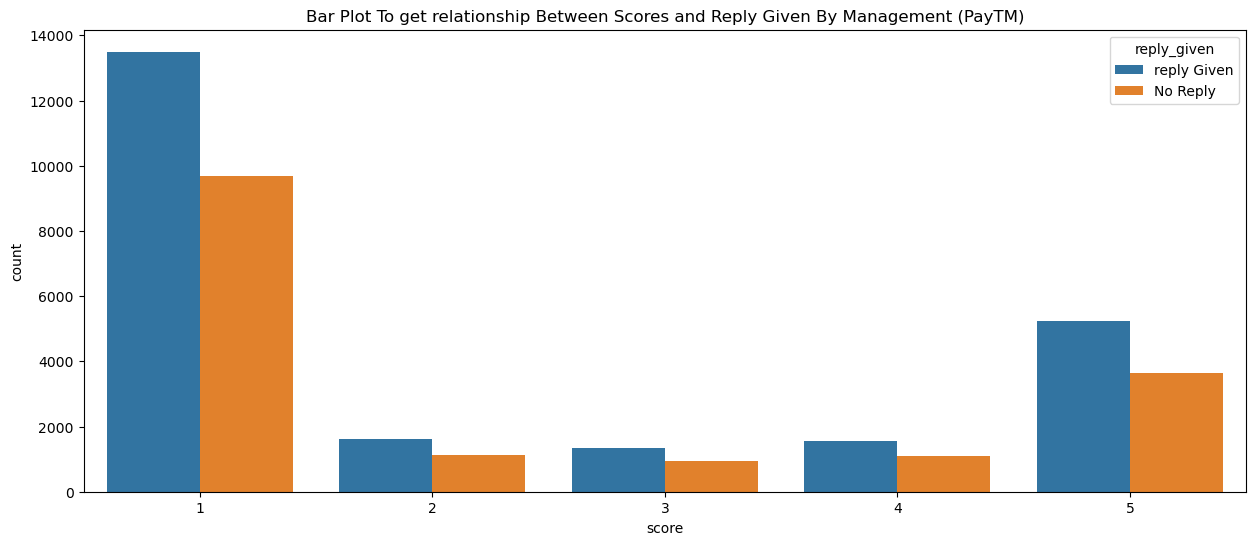

In [38]:
paytm_data["reply_given"] = google_data["replyContent"].apply(lambda x: "reply Given" if x != 'No_reply' else "No Reply")
plt.figure(figsize=(15,6))
sns.countplot(x="score", hue="reply_given", data=paytm_data,hue_order = ['reply Given','No Reply'])
plt.title('Bar Plot To get relationship Between Scores and Reply Given By Management (PayTM)')
plt.show()

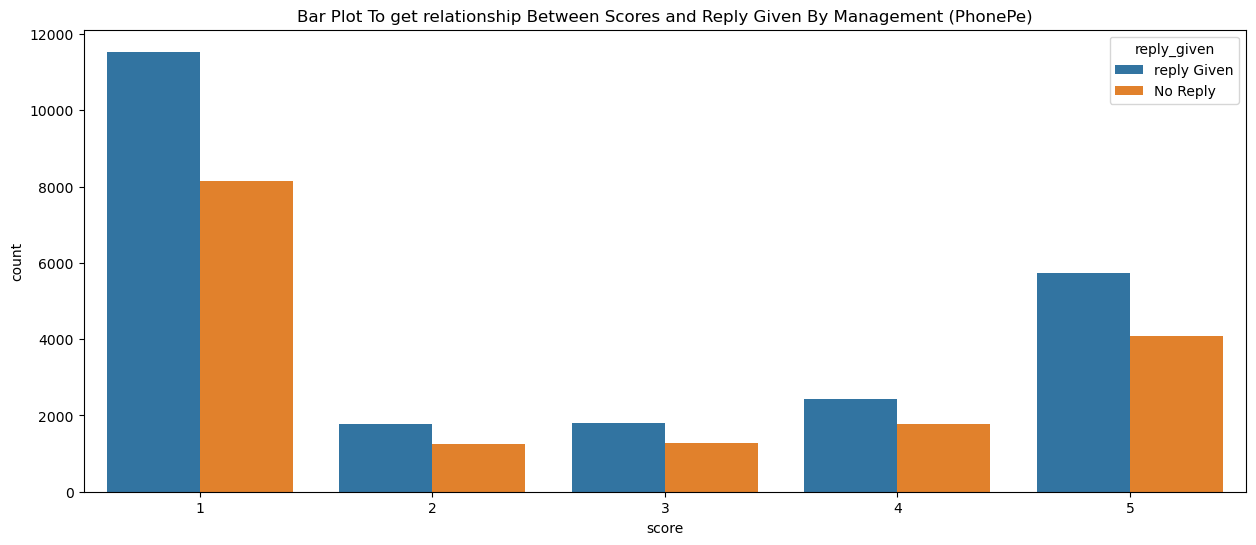

In [39]:
phonepe_data["reply_given"] = google_data["replyContent"].apply(lambda x: "reply Given" if x != 'No_reply' else "No Reply")
plt.figure(figsize=(15,6))
sns.countplot(x="score", hue="reply_given", data=phonepe_data, hue_order = ['reply Given','No Reply'] )
plt.title('Bar Plot To get relationship Between Scores and Reply Given By Management (PhonePe)')
plt.show()

The plots reveal that for all three apps, reviews with lower scores (1 and 2) are more likely to receive a reply from the management. This suggests that the management teams of these apps are actively trying to address the issues pointed out in negative reviews. While GPay lacks in replying to higher scores.

# Relationship between 'scores' and 'thumbsUpCount'

We also investigate the relationship between scores and the number of upvotes (or 'thumbs up') a review receives. We use a bar plot to visualize the average number of upvotes for each score. Since we have removed outliers, this plots shows us general trend.

This block of code creates a bar plot to visualize the relationship between 'score' and 'thumbsUpCount'. The x-axis represents the scores, the y-axis represents the number of thumbs up, and each bar represents a score. This is repeated for each company's data.

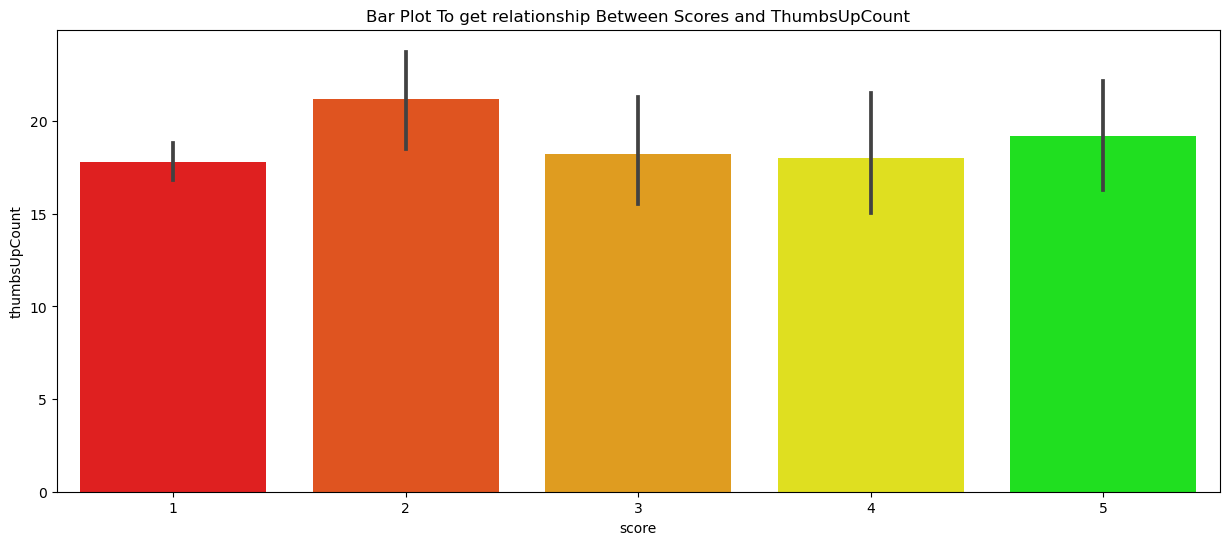

In [40]:
plt.figure(figsize=(15,6))
sns.barplot(x="score", y="thumbsUpCount", data=google_data, palette= ["#FF0000", "#FF4500", "#FFA500", "#FFFF00", "#00FF00"])
plt.title('Bar Plot To get relationship Between Scores and ThumbsUpCount')
plt.show()

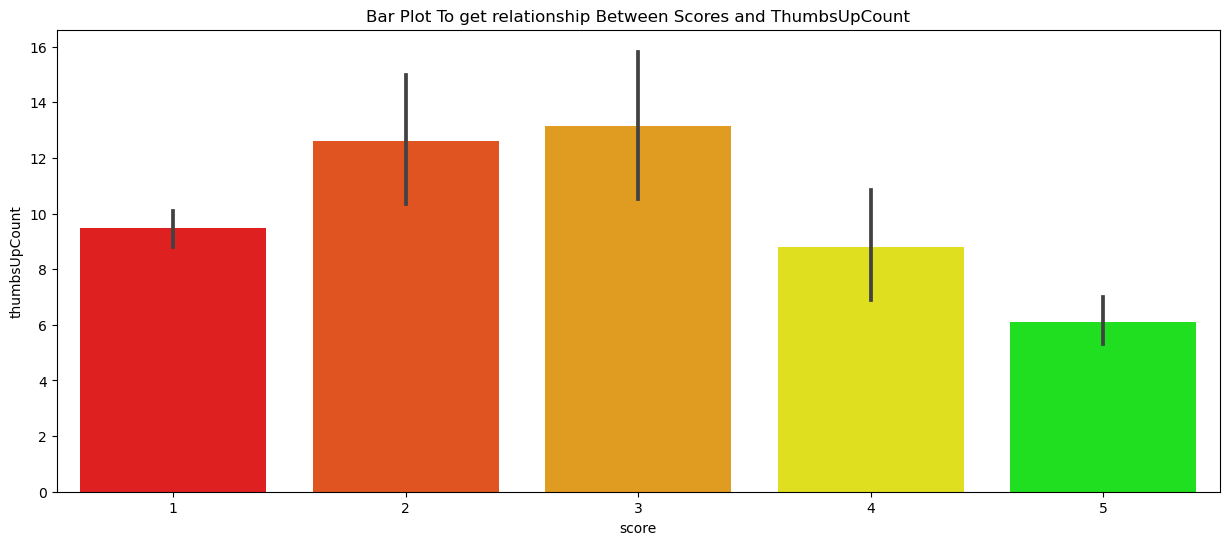

In [41]:
plt.figure(figsize=(15,6))
sns.barplot(x="score", y="thumbsUpCount", data=paytm_data,palette= ["#FF0000", "#FF4500", "#FFA500", "#FFFF00", "#00FF00"])
plt.title('Bar Plot To get relationship Between Scores and ThumbsUpCount')
plt.show()

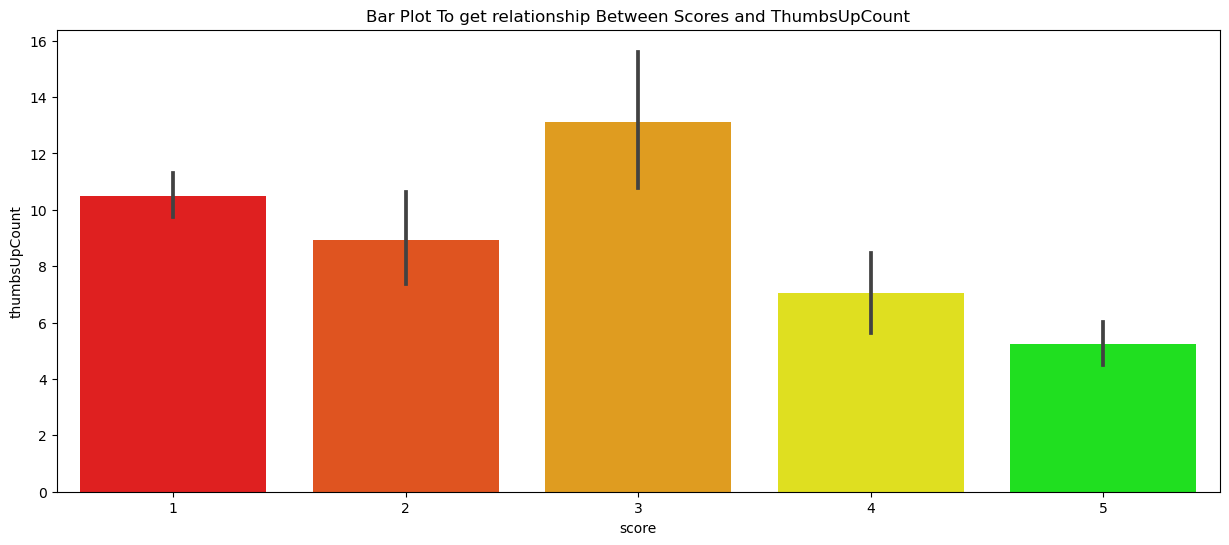

In [42]:
plt.figure(figsize=(15,6))
sns.barplot(x="score", y="thumbsUpCount", data=phonepe_data,palette= ["#FF0000", "#FF4500", "#FFA500", "#FFFF00", "#00FF00"])
plt.title('Bar Plot To get relationship Between Scores and ThumbsUpCount')
plt.show()

Interestingly, for all three apps, reviews with lower scores (1 and 2 and 3 Stars) tend to receive more upvotes. This could be because users upvote reviews that highlight problems they also face, which are generally expressed in negative reviews.

# EDA on Combined Data of three apps



Finally, we perform some analysis on the combined data of all three apps. This enables us to compare the apps and draw some overall conclusions.

In [43]:
google_data["upi_app"] = "GPay"
paytm_data["upi_app"] = "Paytm"
phonepe_data["upi_app"] = "PhonePe"

combineddata = pd.concat([google_data,paytm_data,phonepe_data],ignore_index=True)

This block of code adds a new column 'upi_app' to each dataset to indicate the company, then concatenates all datasets into a new dataframe 'combineddata'.

## Comparison of Reviews Across Apps

We start by looking at the distribution of scores across the three apps. This is visualized using a count plot, which shows the number of reviews for each score, separated by the app.

A count plot is created to show which company has the maximum number of reviews in all categories. The x-axis represents the scores, the y-axis represents the number of reviews, and the different colors in each bar represent different companies.

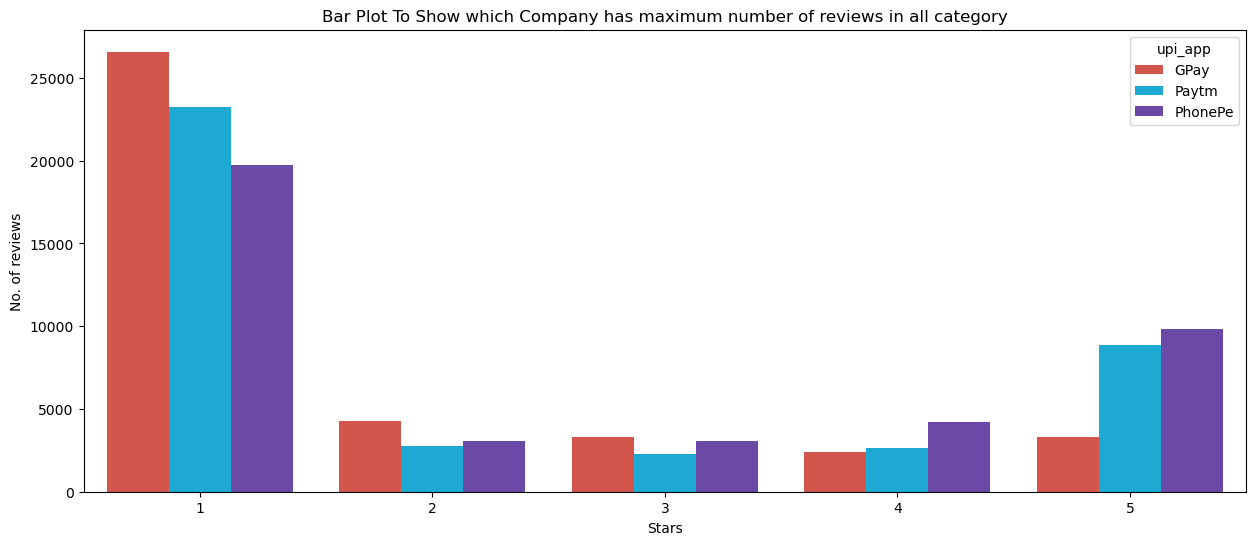

In [44]:
plt.figure(figsize=(15,6))
sns.countplot(x="score", hue="upi_app", data=combineddata,  palette=['#EA4335','#00B9F1','#6739B7'])
plt.xlabel('Stars')
plt.ylabel('No. of reviews')
plt.title('Bar Plot To Show which Company has maximum number of reviews in all category')
plt.show()

The plot reveals that Phonepe has highest number of 5 star and 4 star reviews followed by Paytm. However, Google Pay has a higher proportion of 1-star reviews, suggesting lower overall user satisfaction.

## Percentage of Unreplied Reviews by Management

We also look at the percentage of reviews that did not receive a reply from the management team. This is calculated as the number of reviews with no reply divided by the total number of reviews, for each app.

This block of code calculates the percentage of reviews to which each company didn't reply and visualizes it in a bar plot. The x-axis represents the companies, the y-axis represents the percentage of no reply, and each bar represents a company.

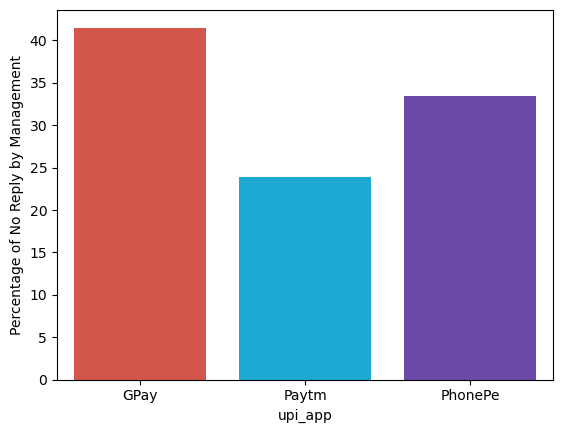

In [45]:
no_replies = combineddata[combineddata['replyContent'] == 'No_reply'].groupby('upi_app')['replyContent'].count()
total_replies = combineddata.groupby('upi_app')['replyContent'].count()
percentages = (no_replies / total_replies) * 100


sns.barplot(x=percentages.index, y=percentages,palette=['#EA4335','#00B9F1','#6739B7'])
plt.ylabel('Percentage of No Reply by Management')
plt.show()

The bar plot reveals that Google Pay has the highest percentage of unreplied reviews, followed by PhonePe and Paytm. This suggests that Paytm's management team is the most responsive in addressing user feedback.

.

# Conclusion and Recommendations

### Our EDA has revealed some interesting insights about user reviews for Google Pay, Paytm, and PhonePe. 
#### Here are some key takeaways:

1. Google Pay has the highest proportion of 1-star reviews, suggesting lower overall user satisfaction.
2. Paytm's management team is the most responsive in addressing user feedback.
3. Negative reviews tend to receive more upvotes and are more likely to be responded to by the management.
4. Based on these findings, we recommend that the app management teams focus on addressing the issues highlighted in negative reviews, as these are often upvoted by other users facing similar issues. Additionally, maintaining a high response rate to user feedback can improve user satisfaction and potentially improve app ratings.

#### For individual performance improvements, we recommend the following:

##### **Google Pay:**
The most common negative words in the reviews are 'issue' and 'transaction'. This suggests that users are having problems while performing transactions. Possible improvements could include:

* Transaction process: Investigate why users are reporting issues with transactions. This could be due to app crashes during transactions, transactions failing but the amount being debited, or users not receiving cashback or rewards promised by the app. Once the root cause is identified, necessary steps should be taken to rectify the issues.

* Clear communication: Ensure that any errors or issues are clearly communicated to the users. If there is a problem with the transaction, the app should provide a clear and understandable reason for the failure. This will help users understand what went wrong and how to prevent it in the future.
 
* High Proportion of 1-star reviews: It's crucial to identify and address the common issues raised in these reviews. The analysis of negative words shows that 'transaction' and 'issue' are common, indicating possible issues with transaction processes in the app.

##### **Paytm:** 
While the management team's response rate is commendable, efforts should be made to improve the overall user experience, as indicated by the high number of negative reviews.The common negative words are 'customer' and 'service', indicating issues with customer service.

* Customer service: Invest in improving customer service response times and effectiveness. Users should feel that their concerns are heard and addressed promptly and satisfactorily.
 
* User experience: A high number of reviews may point to complexities in the app interface that are causing users to seek help. Simplifying the user interface and making it more intuitive could reduce the need for customer service interaction.
 

##### **PhonePe:** 
Similar to Paytm, the focus should be on improving the user experience and addressing common issues raised in negative reviews.
The word 'transaction' appears commonly in negative reviews, similar to Google Pay.

* Transaction process: Like Google Pay, PhonePe should investigate and address the transaction-related issues reported by users.

####  > Remember, this is just the tip of the iceberg. So, keep exploring and happy analyzing!